<a href="https://colab.research.google.com/github/AyaHegzay/ML-52-1665/blob/main/Clustering_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Lab 2 - Clustering Exercise**

In this exercise, we will apply our knowledge of clustering on the following dataset:

Dataset Link:
https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

Clustering on this dataset will be done using KMeans, Hierarchal clustering and DBSCAN. Finding the optimal hypermaters for each and then choosing the best model among the three

Start by Importing needed libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the dataset into a DataFrame

In [ ]:
df = pd.read_csv("/content/CC GENERAL.csv")

In [ ]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df = df.fillna(0)

In [ ]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df = pd.get_dummies(df)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

## K-Means

Find the optimal Kmeans model

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
from sklearn.cluster import KMeans
sum2_dist = []
scores = []

for k in range(2,7):
    model = KMeans(n_clusters=k)
    labels = model.fit_predict(scaled_df)
    sum2_dist.append(model.inertia_)
    scores.append(silhouette_score(scaled_df, labels))

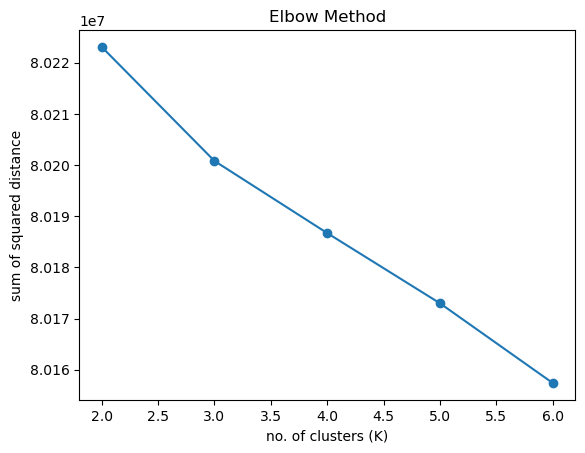

In [ ]:
plt.plot(range(2,7), sum2_dist, marker='o')
plt.xlabel('no. of clusters (K)')
plt.ylabel('sum of squared distance')
plt.title('Elbow Method')
plt.show()

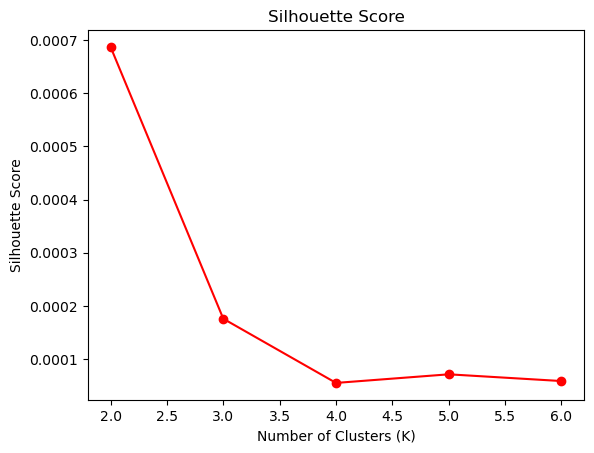

In [ ]:
plt.plot(range(2,7), scores, marker='o', color='red')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

Choose the optimal K and calculate the silhouette score for the best model.

From the Silhouette scores graph, the data is best to be clustered into 2 clusters since at k=2 the score was the highest.
Also from the graph the scores are very low for all clusters which means that the dataset is not suitable for clustering

## Agglomerative Clustering

Find the optimal agglomerative clustering model.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
score=[]
for i in range(2,7):
    model = AgglomerativeClustering(n_clusters=i, metric="cosine", linkage="single")
    model = model.fit_predict(scaled_df)
    score.append(silhouette_score(df,model))

In [ ]:
plt.plot(range(2,7), scores, marker='o', color='red')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
score=[]
for i in range(2,7):
    model = AgglomerativeClustering(n_clusters=i, metric="eucildean", linkage="ward")
    model = model.fit_predict(df)
    score.append(silhouette_score(df,model))

In [ ]:
plt.plot(range(2,7), scores, marker='o', color='red')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

Choose the optimal K and calculate the silhouette score for the best model.

## DBSCAN

Find the optimal DBSCAN model.

Find the parameters that optimize the performance of your model and calculate the silhouette score.

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=2, min_samples=5)
cluster_labels = dbscan.fit_predict(scaled_df)
scores1 = silhouette_score(scaled_df, cluster_labels)
print(scores1)

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1, min_samples=3)
cluster_labels = dbscan.fit_predict(scaled_df)
scores2 = silhouette_score(scaled_df, cluster_labels))
print(scores2)

## Result Interpretation and Discussion

Which model was chosen? Why was it chosen and based on what?